In [1]:
# Please visit:
#
# https://download.nkg-mn.com/credo/anomalies/
#
# Pretrained dots_v2.h5 and others can be downloaded from mentioned website.

In [2]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_v2_spread.pickle'
TRACKS_DST = 'cache/tracks_v2_spread.pickle'
WORMS_DST = 'cache/worms_v2_spread.pickle'
ARTIFACTS_DST = 'cache/artifacts_v2_spread.pickle'

DOTS_AC = 'cache/dots_v2_spread.h5'
TRACKS_AC = 'cache/tracks_v2_spread.h5'
WORMS_AC = 'cache/worms_v2_spread.h5'
ARTIFACTS_AC = 'cache/artifacts_v2_spread.h5'


def train_and_test(train_set, validation_set, fn):
    autoencoder = original_autoencoder()
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True)

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
2108/2108 [==============================] - 28s 12ms/step - loss: 0.0184 - accuracy: 0.9776 - val_loss: 1.9561e-04 - val_accuracy: 0.9949
Epoch 2/200
2108/2108 [==============================] - 25s 12ms/step - loss: 9.5504e-05 - accuracy: 0.9947 - val_loss: 1.5079e-04 - val_accuracy: 0.9949
Epoch 3/200
2108/2108 [==============================] - 24s 12ms/step - loss: 6.9502e-05 - accuracy: 0.9947 - val_loss: 1.2283e-04 - val_accuracy: 0.9949
Epoch 4/200
2108/2108 [==============================] - 24s 11ms/step - loss: 5.8220e-05 - accuracy: 0.9947 - val_loss: 6.1884e-05 - val_accuracy: 0.9949
Epoch 5/200
2108/2108 [==============================] - 24s 11ms/step - loss: 5.0386e-05 - accuracy: 0.9947 - val_loss: 4.8425e-05 - val_accuracy: 0.9949
Epoch 6/200
2108/2108 [==============================] - 24s 11ms/step - loss: 4.2605e-05 - accuracy: 0.9947 - val_loss: 5.2072e-05 - val_accuracy: 0.9949
Epoch 

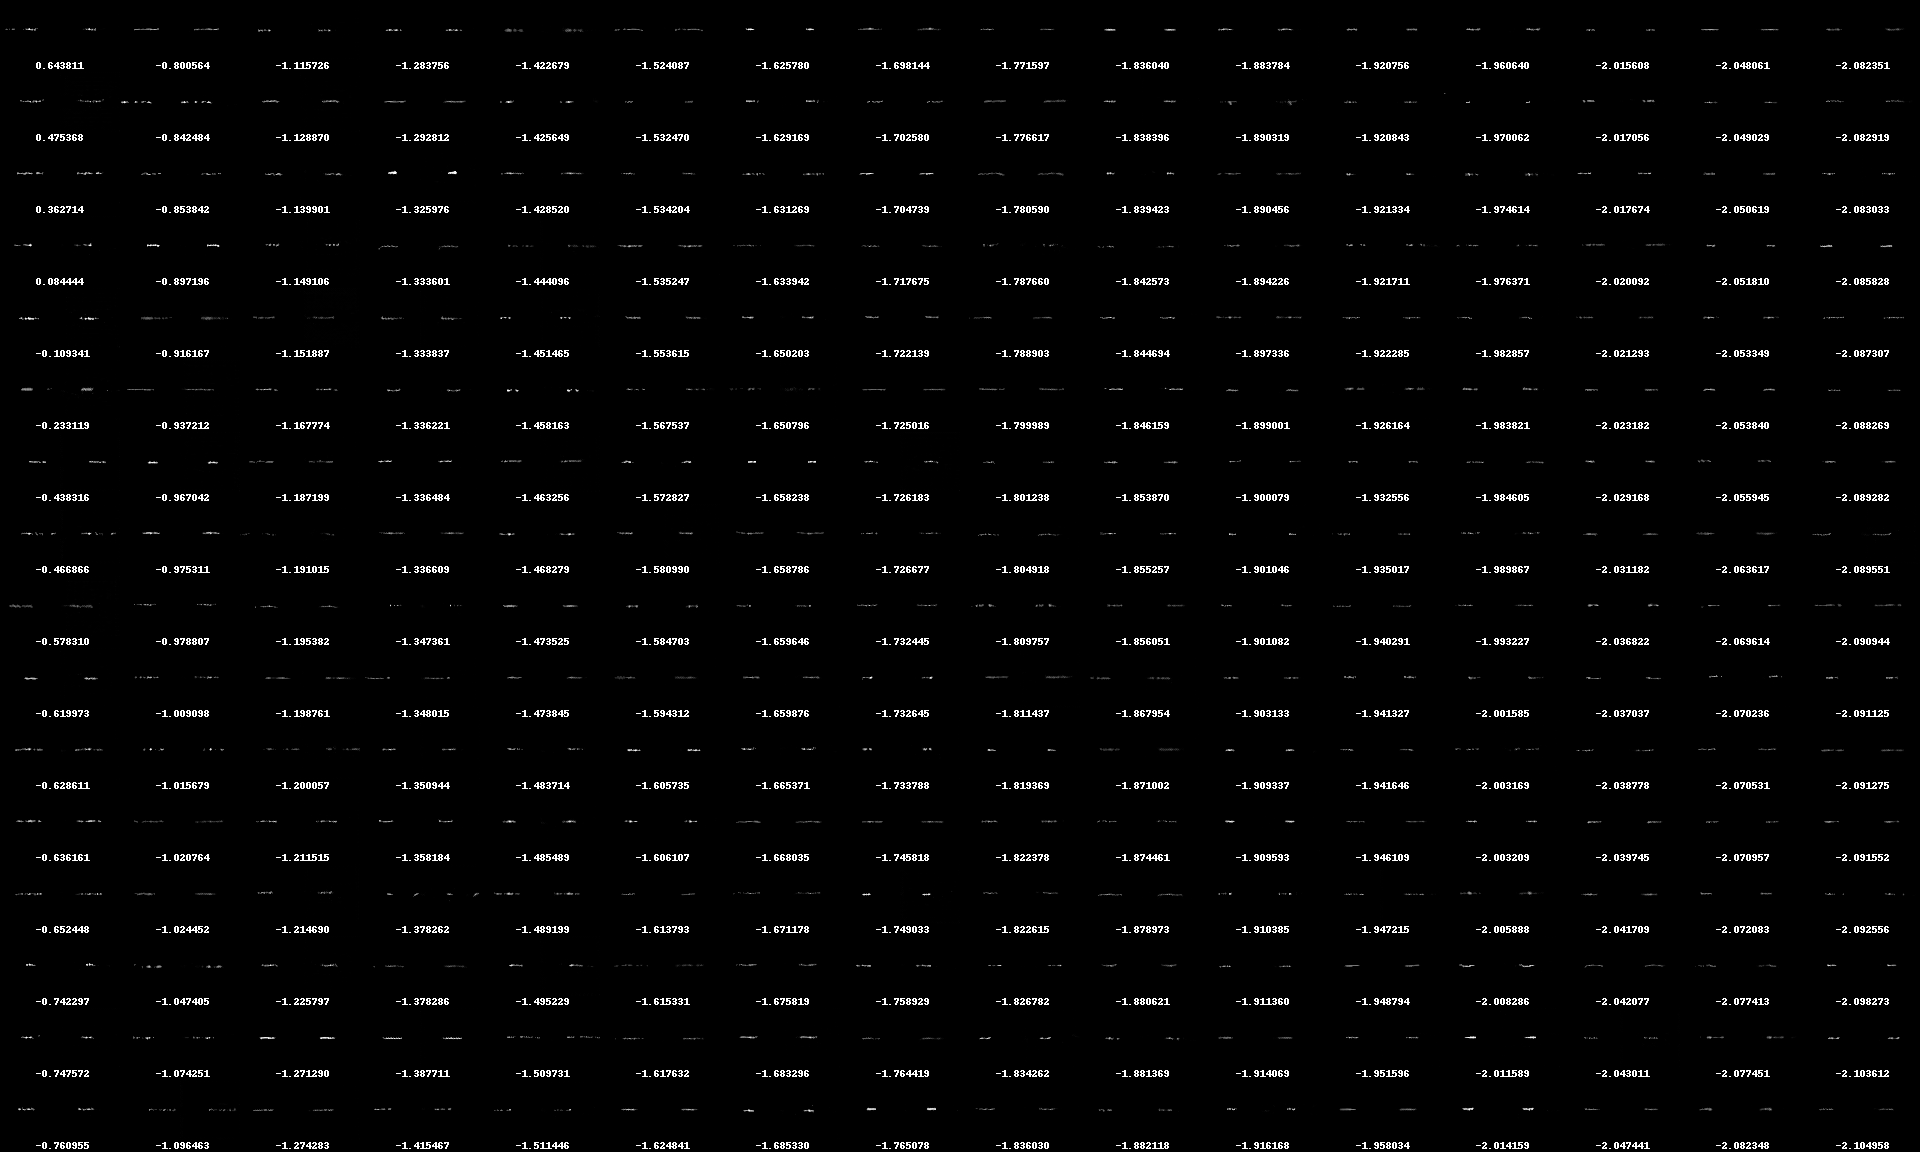

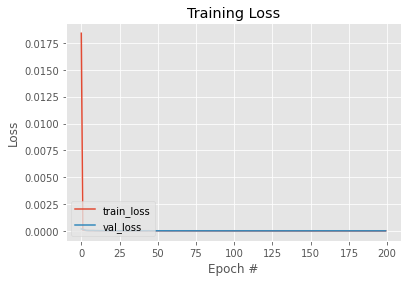

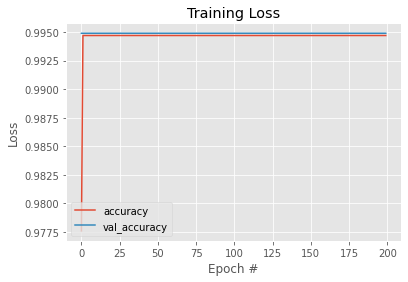

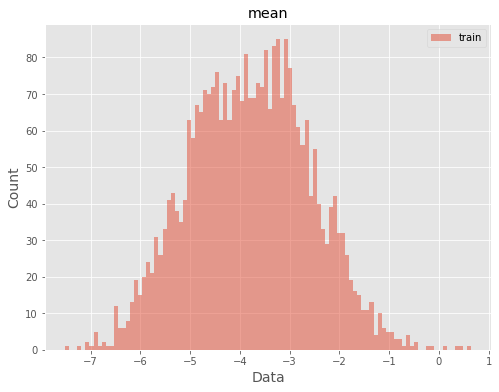

In [3]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
1290/1290 [==============================] - 16s 11ms/step - loss: 0.0085 - accuracy: 0.9912 - val_loss: 4.8031e-05 - val_accuracy: 0.9981
Epoch 2/200
1290/1290 [==============================] - 14s 11ms/step - loss: 4.2658e-05 - accuracy: 0.9980 - val_loss: 2.8178e-05 - val_accuracy: 0.9981
Epoch 3/200
1290/1290 [==============================] - 14s 11ms/step - loss: 2.7206e-05 - accuracy: 0.9980 - val_loss: 1.9873e-05 - val_accuracy: 0.9981
Epoch 4/200
1290/1290 [==============================] - 15s 12ms/step - loss: 1.3441e-05 - accuracy: 0.9980 - val_loss: 1.5631e-05 - val_accuracy: 0.9981
Epoch 5/200
1290/1290 [==============================] - 15s 12ms/step - loss: 1.2506e-05 - accuracy: 0.9980 - val_loss: 1.3610e-05 - val_accuracy: 0.9981
Epoch 6/200
1290/1290 [==============================] - 15s 12ms/step - loss: 9.8629e-06 - accuracy: 0.9980 - val_loss: 1.1793e-05 - val_accuracy: 0.9981
Epoch 

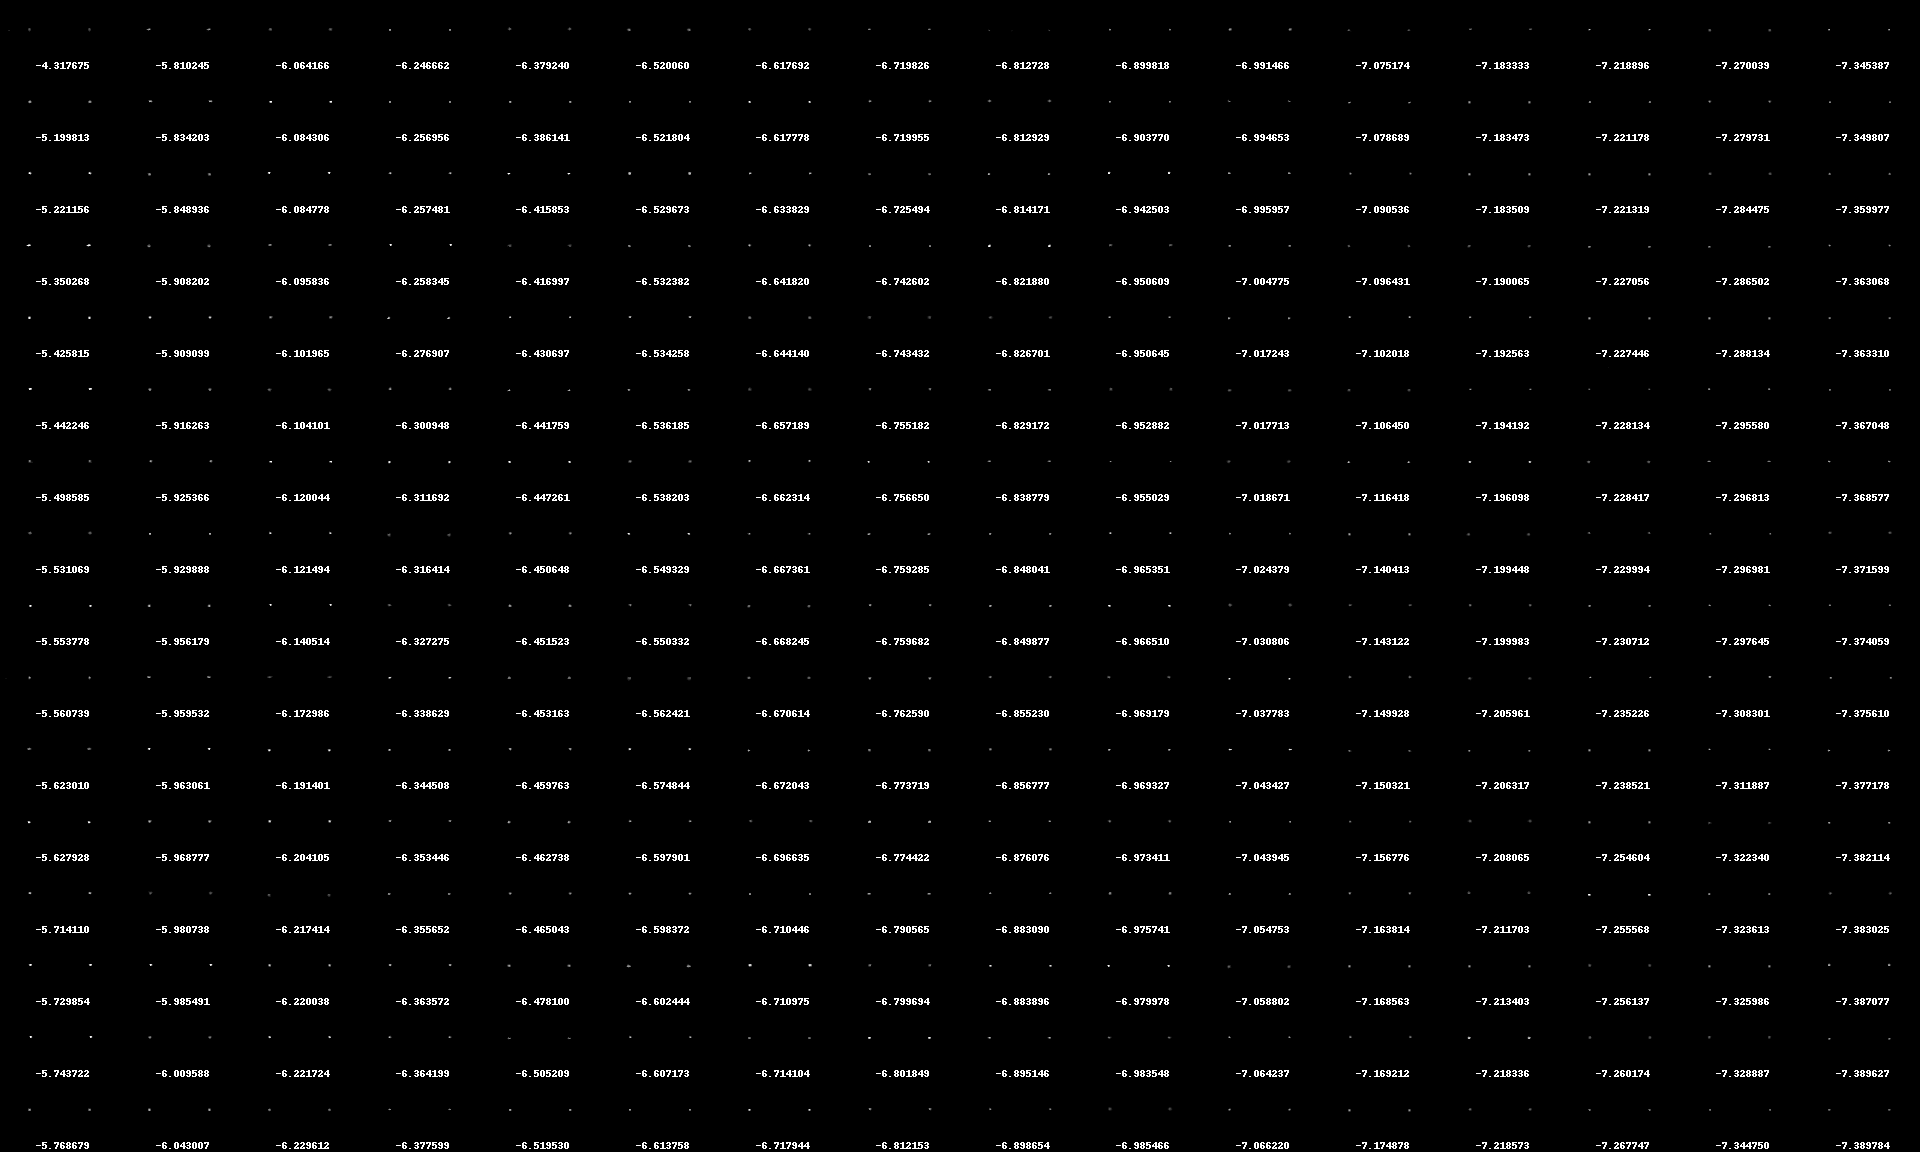

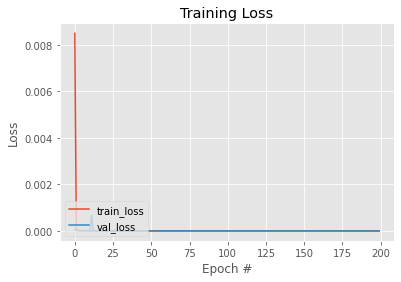

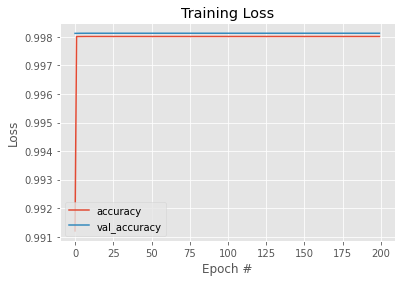

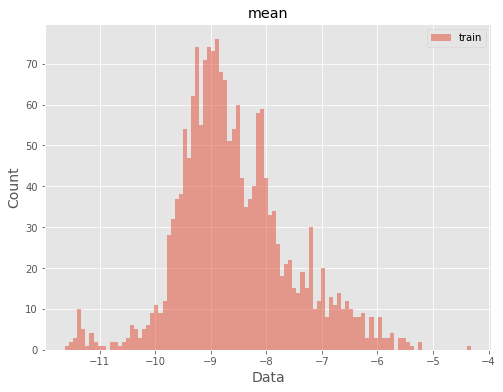

In [4]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0428 - accuracy: 0.9546 - val_loss: 0.0269 - val_accuracy: 0.9668
Epoch 2/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0266 - accuracy: 0.9666 - val_loss: 0.0258 - val_accuracy: 0.9676
Epoch 3/200
341/341 [==============================] - 4s 10ms/step - loss: 0.0242 - accuracy: 0.9685 - val_loss: 0.0229 - val_accuracy: 0.9700
Epoch 4/200
341/341 [==============================] - 4s 10ms/step - loss: 0.0221 - accuracy: 0.9703 - val_loss: 0.0204 - val_accuracy: 0.9719
Epoch 5/200
341/341 [==============================] - 4s 10ms/step - loss: 0.0082 - accuracy: 0.9840 - val_loss: 9.8578e-04 - val_accuracy: 0.9916
Epoch 6/200
341/341 [==============================] - 4s 10ms/step - loss: 7.0353e-04 - accuracy: 0.9914 - val_loss: 7.5505e-04 - val_accuracy: 0.9917
Epoch 7/200
341/341 [==============================] - 4

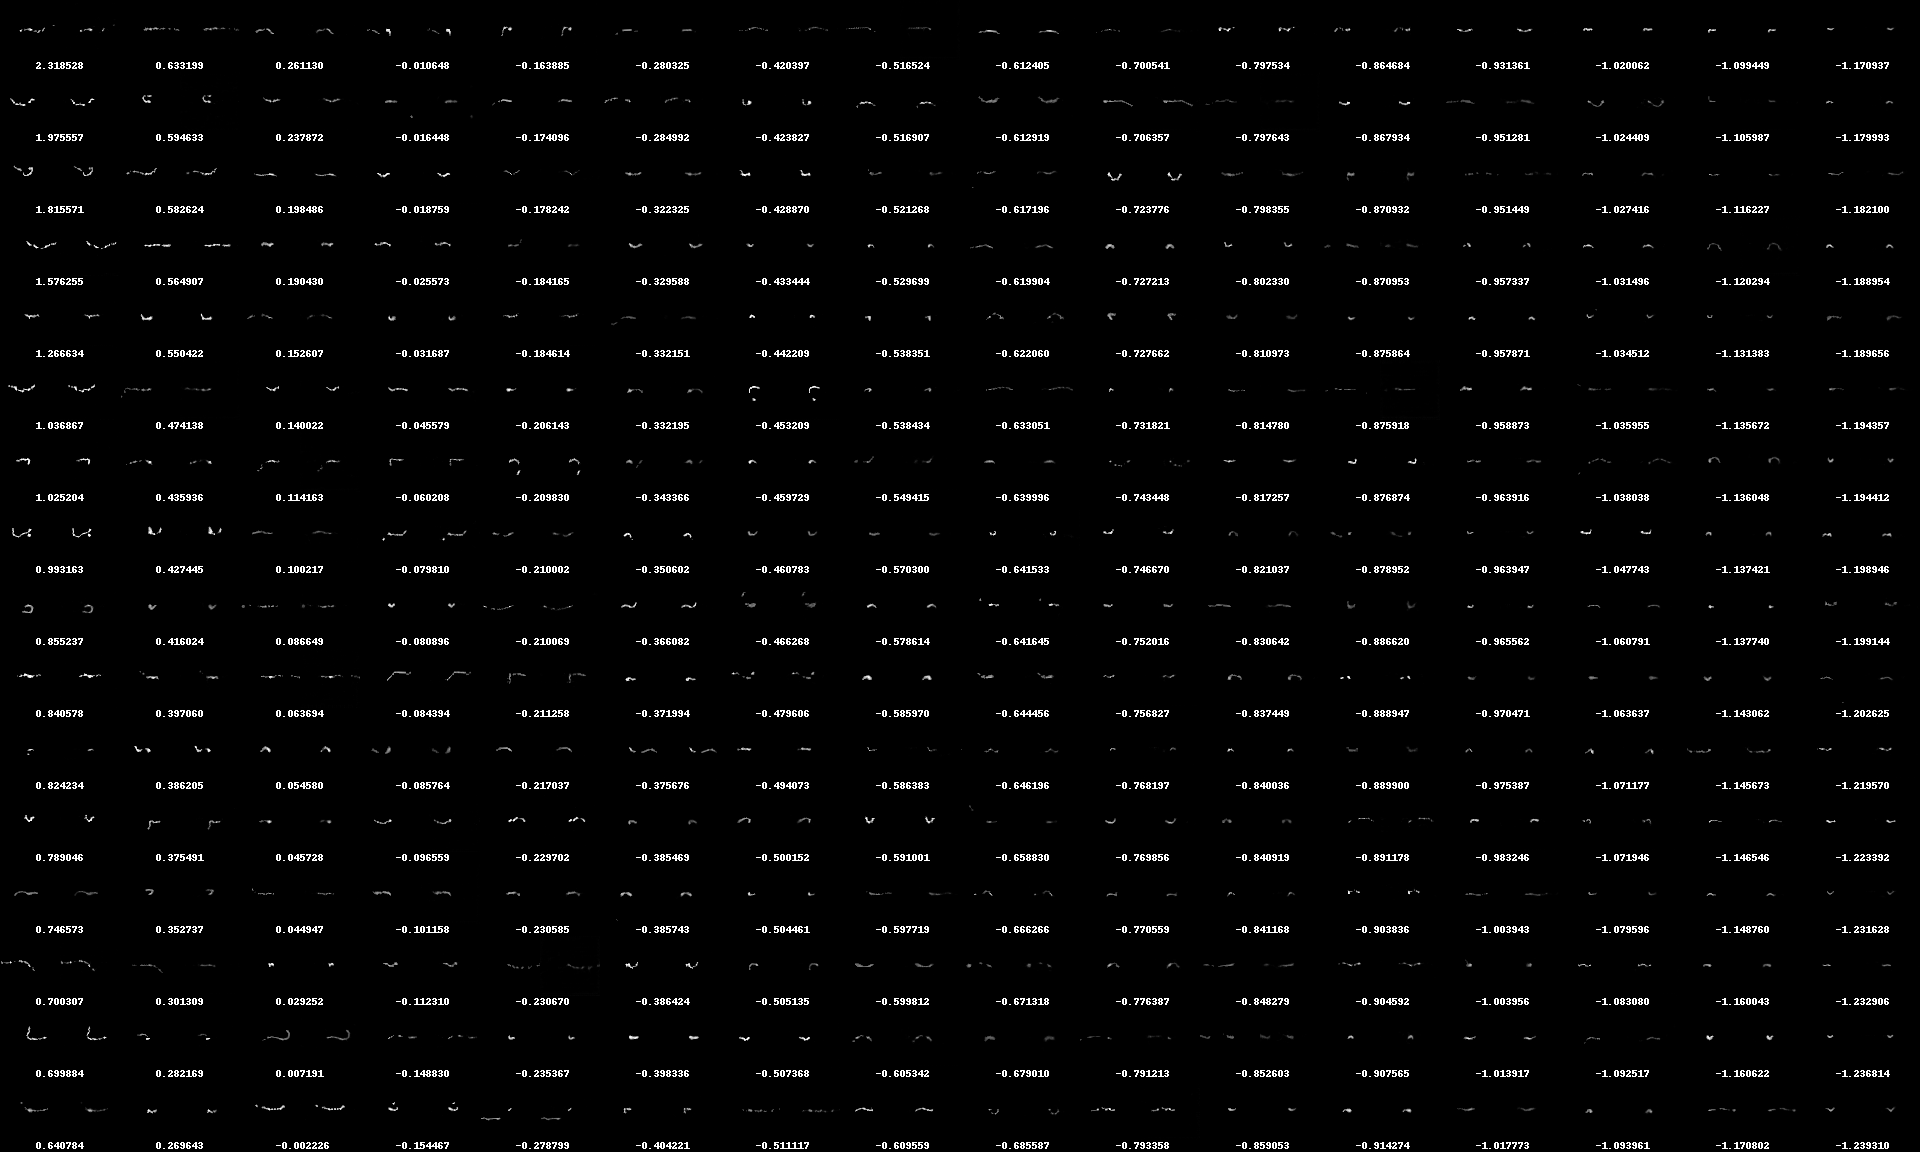

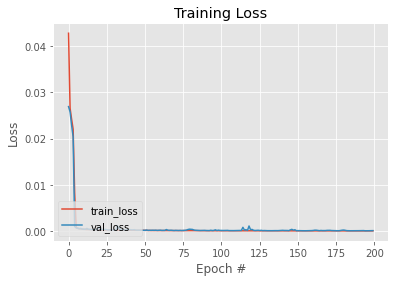

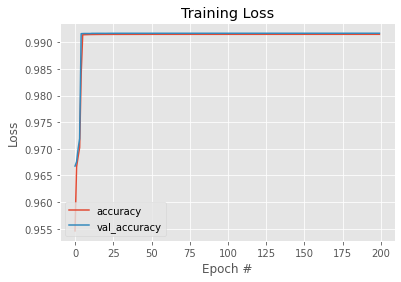

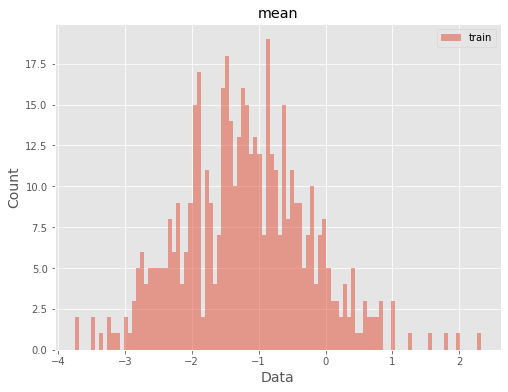

In [5]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
445/445 [==============================] - 6s 12ms/step - loss: 0.0300 - accuracy: 0.9678 - val_loss: 9.3341e-04 - val_accuracy: 0.9938
Epoch 2/200
445/445 [==============================] - 5s 11ms/step - loss: 7.1994e-04 - accuracy: 0.9936 - val_loss: 5.9712e-04 - val_accuracy: 0.9938
Epoch 3/200
445/445 [==============================] - 5s 11ms/step - loss: 5.7420e-04 - accuracy: 0.9936 - val_loss: 5.1139e-04 - val_accuracy: 0.9938
Epoch 4/200
445/445 [==============================] - 5s 11ms/step - loss: 4.8383e-04 - accuracy: 0.9936 - val_loss: 3.9811e-04 - val_accuracy: 0.9938
Epoch 5/200
445/445 [==============================] - 5s 11ms/step - loss: 3.9781e-04 - accuracy: 0.9936 - val_loss: 3.7332e-04 - val_accuracy: 0.9938
Epoch 6/200
445/445 [==============================] - 5s 11ms/step - loss: 4.4526e-04 - accuracy: 0.9936 - val_loss: 4.0523e-04 - val_accuracy: 0.9938
Epoch 7/200
445/445 [===

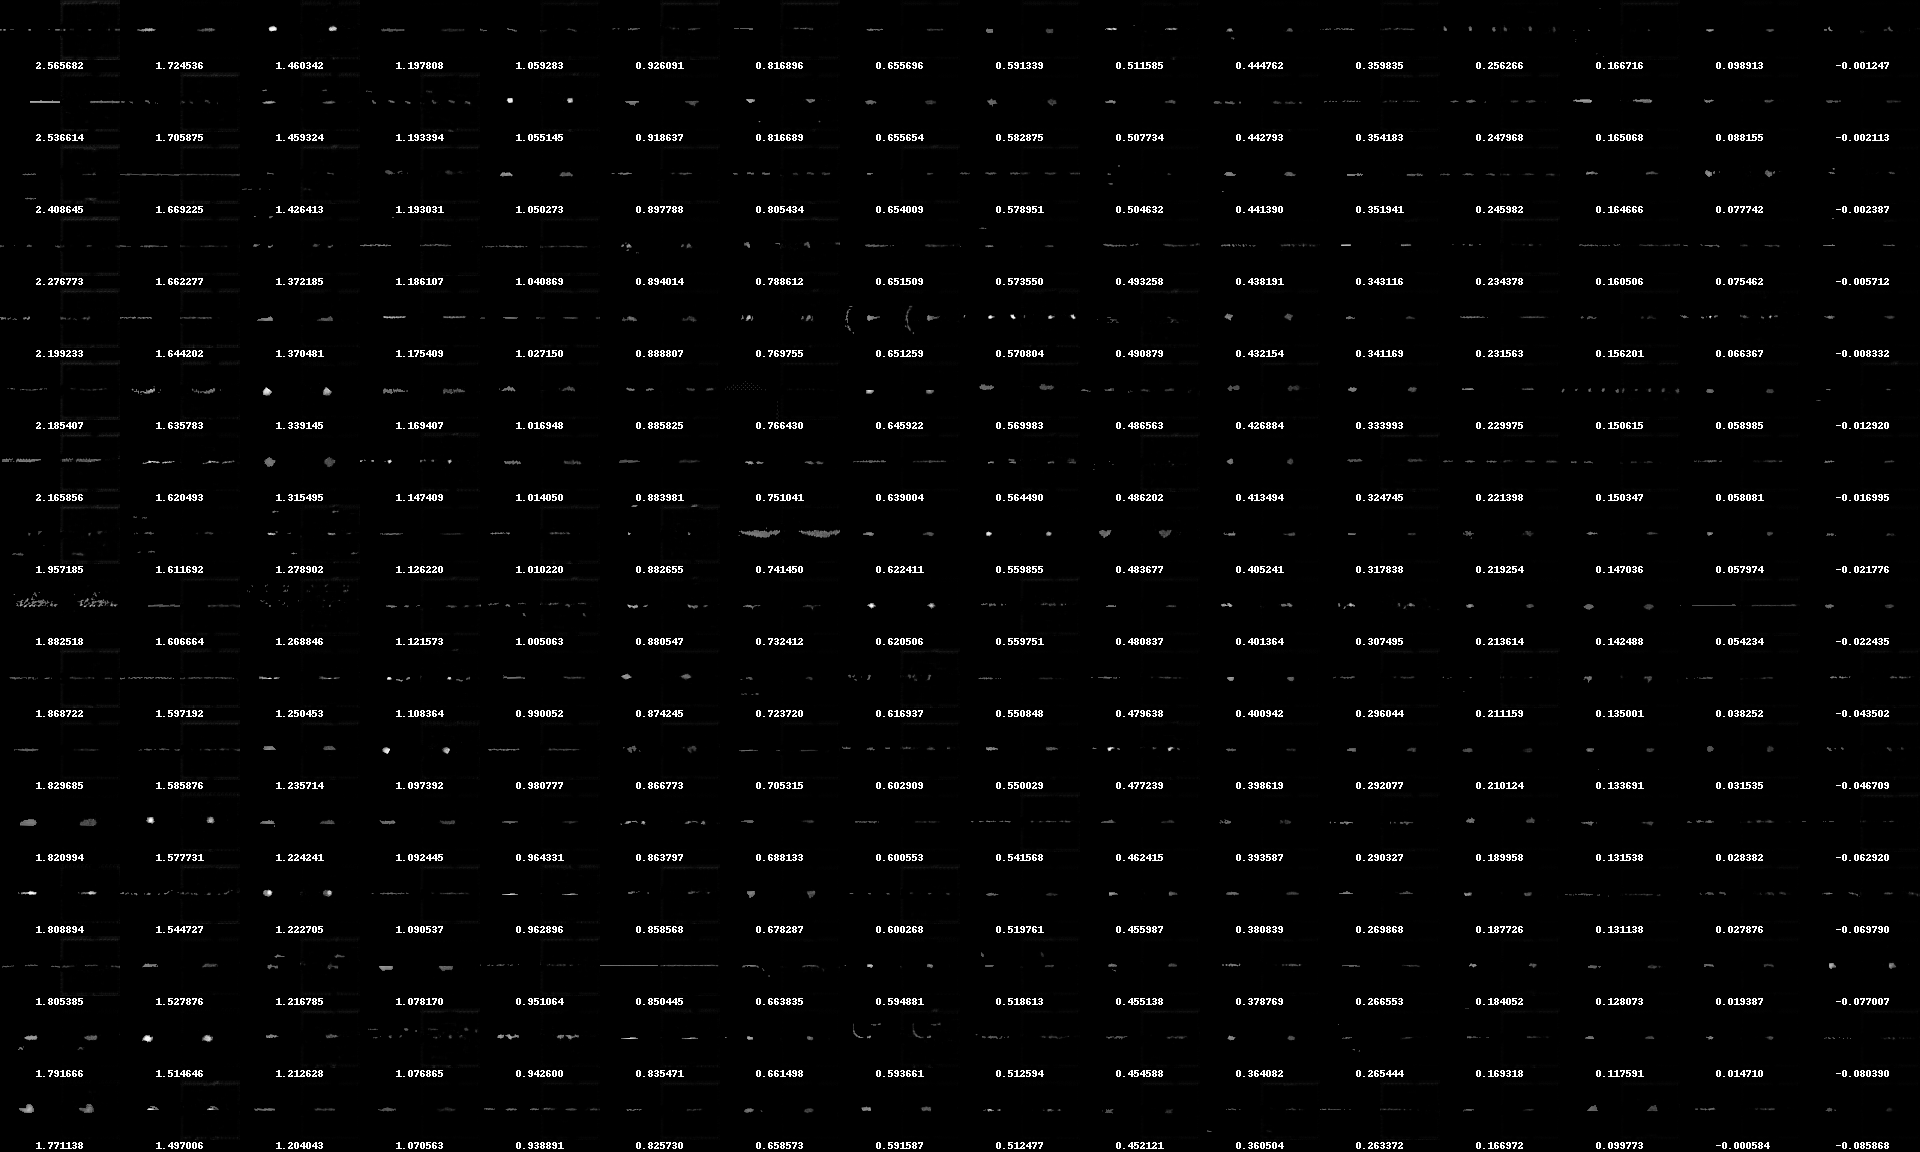

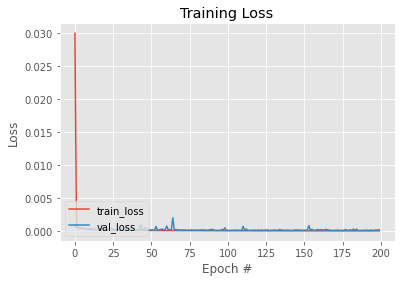

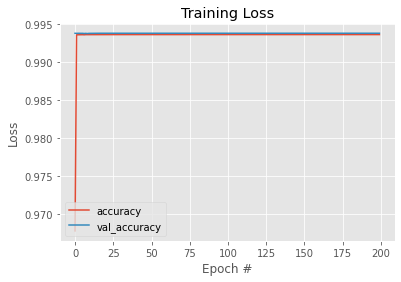

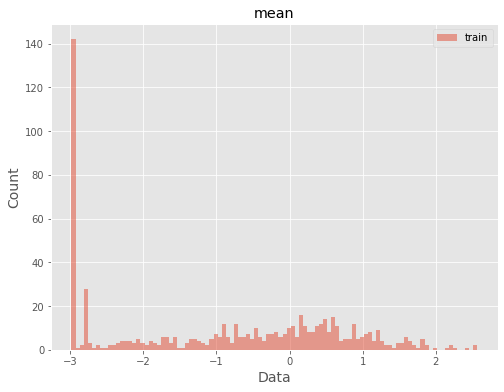

In [6]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)